In [1]:
import gandula
from tqdm.auto import tqdm
import os
import sys

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
project_root = os.path.abspath(
    os.path.join("C:/Users/jllgo/OneDrive/Documentos/UFMG/MSc & MSI 2/MatchSegmentation")
)
if project_root not in sys.path:
    sys.path.append(project_root)

In [4]:
from src.data.loader import FramesLoader
from src.data.dataset import IntervalDataset

In [5]:
DATA_PATH = '../data/raw/PL-22-23'
output_path = "../data/intermediate/PL-22-23"

In [6]:
games = os.listdir(DATA_PATH)
game_ids = [game.split('.')[0] for game in games]

In [7]:
frames_loader = FramesLoader(game_ids[:5], DATA_PATH)
frames_loader.load(output_path)
len(frames_loader)

Loading frames:   0%|          | 0/5 [00:00<?, ?it/s]

5

In [8]:
frame = frames_loader[0]

In [9]:
frame[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28450 entries, 0 to 28449
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                28450 non-null  int64  
 1   frame_id                28450 non-null  int64  
 2   period                  28450 non-null  int64  
 3   elapsed_seconds         28450 non-null  float64
 4   home_has_possession     17900 non-null  float64
 5   event_id                8035 non-null   float64
 6   event_type              28450 non-null  object 
 7   event_setpiece_type     28450 non-null  object 
 8   event_player_id         6570 non-null   float64
 9   event_team_id           6573 non-null   float64
 10  event_start_frame       6878 non-null   float64
 11  event_end_frame         6878 non-null   float64
 12  possession_id           1290 non-null   float64
 13  possession_type         28450 non-null  object 
 14  possession_start_frame  393 non-null  

In [10]:
frame[1]

,elapsed_seconds,frame_id,match_id,period,shirt,x,y,team,ball_x,ball_y,...,ball_vz,ball_speed,ball_ax,ball_ay,ball_az,vx,vy,ax,ay,speed
0,0.000000,1594,4436,1,1,37.992,2.652,away,-2.43,0.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.199720,1600,4436,1,1,37.971,2.714,away,-5.24,0.83,...,0.000000,34.766179,-1041.894311,8.981848,0.000000,0.0,0.0,-0.898212,-9.880328,0.0
2,0.399920,1606,4436,1,1,38.016,2.722,away,-8.95,0.39,...,0.000000,36.859000,-1086.868694,-197.612490,0.000000,0.0,0.0,-52.096277,-12.574963,0.0
3,0.600120,1612,4436,1,1,38.197,2.791,away,-12.14,0.44,...,-0.599413,31.176658,-934.168133,-8.982386,-17.964772,0.0,0.0,-38.623102,-17.066022,0.0
4,0.800321,1618,4436,1,1,38.344,2.757,away,-15.01,0.30,...,0.000000,28.736581,-853.275513,-116.764018,0.000000,0.0,0.0,-58.382009,6.287293,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427829,1758.358480,139265,4436,2,28,-3.379,15.463,home,20.89,34.95,...,0.000000,0.000000,71.856934,-35.928467,17.964233,0.0,0.0,-52.994489,35.030255,0.0
427830,1758.558680,139271,4436,2,28,-3.301,15.605,home,20.64,35.06,...,0.000000,0.000000,71.856934,-35.928467,17.964233,0.0,0.0,-50.299854,-258.684961,0.0
427831,1758.758881,139277,4436,2,28,-3.201,15.213,home,20.40,35.16,...,0.000000,0.000000,71.854780,-26.945543,17.963695,0.0,0.0,-9.880032,17.065510,0.0
427832,1758.959081,139283,4436,2,28,-3.093,15.279,home,20.15,35.27,...,0.000000,0.000000,71.854780,-35.927390,17.963695,0.0,0.0,23.352804,113.171279,0.0


In [11]:
dataset = IntervalDataset(frame[0], frame[1])

Processing data: 100%|██████████| 19314/19314 [00:35<00:00, 546.48it/s]


In [26]:
dataset.data_list[15].x[21]

tensor([-8.7880,  4.4810,  0.0000,  0.0000,  1.0000])

In [ ]:
dataset.data_list

In [52]:
import numpy as np

In [54]:
for i in tqdm(range(len(dataset))):
    for j in range(len(dataset.data_list[i])):
        if dataset.data_list[i].x[j][-1] is nan:
            print(dataset.data_list[i].x[j][-1])

  0%|          | 0/19314 [00:00<?, ?it/s]

NameError: name 'nan' is not defined

tensor([[-27.1000,  -4.9220,   0.0000,   0.0000,   0.0000],
        [  9.7840,   3.0510,   0.0000,   0.0000,   0.0000],
        [ 21.7340, -32.8250,   0.0000,   0.0000,   0.0000],
        [ 19.2520, -19.3050,   0.0000,   0.0000,   0.0000],
        [  3.9510,  -9.9180,   0.0000,   0.0000,   0.0000],
        [ 29.8640, -22.7280,   0.0000,   0.0000,   0.0000],
        [ 26.1970,  -0.6950,   0.0000,   0.0000,   0.0000],
        [ 21.5610, -29.8690,   0.0000,   0.0000,   0.0000],
        [ 30.7680, -14.2950,   0.0000,   0.0000,   0.0000],
        [ 30.8970, -30.9970,   0.0000,   0.0000,   0.0000],
        [ 24.2900,  -5.6700,   0.0000,   0.0000,   0.0000],
        [ 34.6840, -24.6230,   0.0000,   0.0000,   0.0000],
        [ 29.9760, -18.3120,   0.0000,   0.0000,   0.0000],
        [ 37.1370, -25.4260,   0.0000,   0.0000,   0.0000],
        [ 19.0520, -16.5380,   0.0000,   0.0000,   0.0000],
        [ 31.9410, -25.1150,   0.0000,   0.0000,   0.0000],
        [ 44.4770,  -4.5930,   0.0000,  

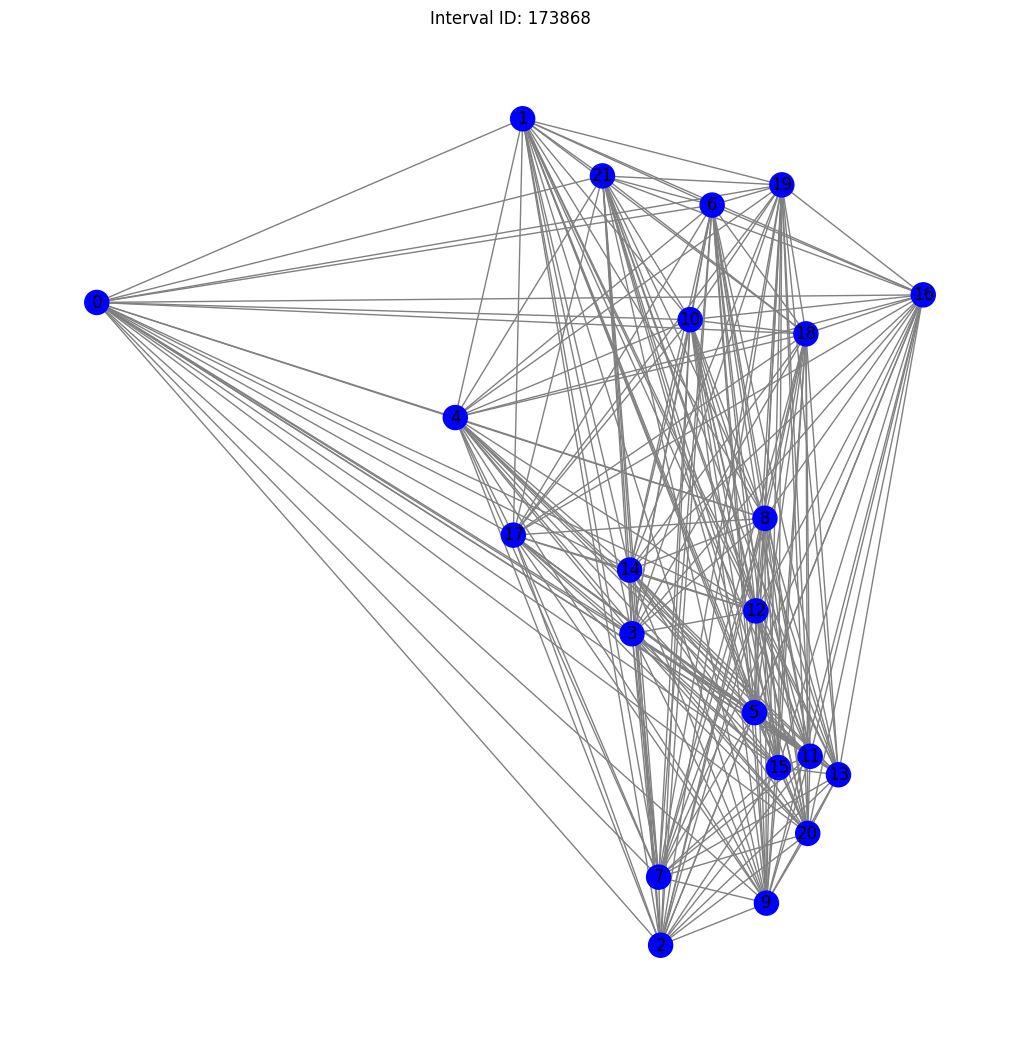

In [60]:
dataset.view(-3)